In [6]:
from omg_dosimetry.tiff2dose import Gaf
from omg_dosimetry.calibration import load_lut_array
from pathlib import Path
from image import load

### Is LUT from Dosepy compatible with OMG Gaf class?

In [7]:
verif_path = Path("/home/luis/Descargas") / "VERIFICACION_1.tif" # Personal laptop
verif = load(verif_path)

In [8]:
verif

In [13]:
from omg_dosimetry.calibration import save_lut
import numpy as np

# Load lut (./user/test_lut.npy)
np.load("../user/calibration/test_lut.npy")
#save_lut("/home/luis/Descargas")

array([[    0.,    50.,   100.,   150.,   200.,   300.,   500.,   800.,
         1000.],
       [    0.,    50.,   100.,   150.,   200.,   300.,   500.,   800.,
         1000.],
       [37584., 30194., 26092., 23218., 21039., 18259., 14913., 12579.,
        11700.],
       [43683., 32512., 27007., 23535., 21151., 18356., 15515., 13682.,
        12980.],
       [42031., 33710., 28796., 25130., 22258., 18509., 13893., 10956.,
         9956.],
       [27037., 24361., 22472., 20990., 19708., 17912., 15330., 13098.,
        12165.]])

In [ ]:
gaf1 = Gaf(
    path=demo_path,
    lut_file=lut_file,
    fit_type='rational',
    clip=1100,
    )

#### No es compatible.
Habría que modificar la clase Gaf para que lea el archivo LUT desde un array, así como modificar la función load.

#### ¿Cómo guardar una clase Dosepy.calibration.Calibration?
https://realpython.com/python-pickle-module/

# Film segmentation

In [2]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray

img_path = "/media/luis/TOMO/Dosepy/BQT_INCAN/Tiff/fondo001.tif"
img = iio.imread(img_path)

from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import colors

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

In [3]:
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1, vmax=1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

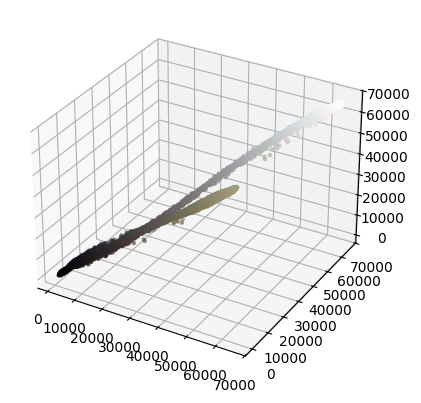

In [4]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter3D(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
plt.show()

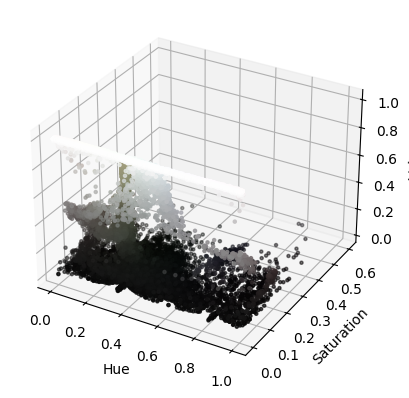

In [5]:
from skimage.color import rgb2hsv

hsv_img = rgb2hsv(img)

h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

## Segmentation based on HSV 

In [11]:
import numpy.ma as ma

mask_h = ma.masked_less(h, 0.32)
mask_s = ma.masked_less(s, 0.35)
mask_v = ma.masked_less(v, 0.75)

film = 0*np.zeros(img.shape)

film[:,:,0]=mask_h.mask
film[:,:,1]=mask_s.mask
film[:,:,2]=mask_v.mask

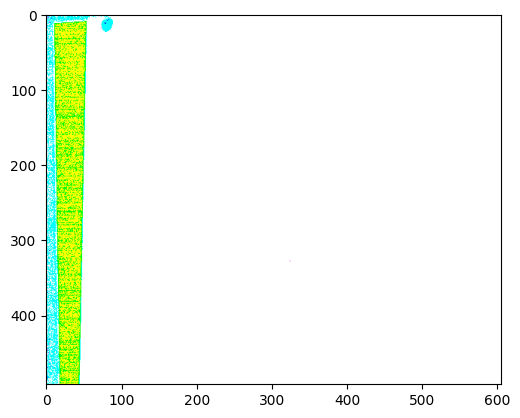

In [12]:
plt.imshow(film)

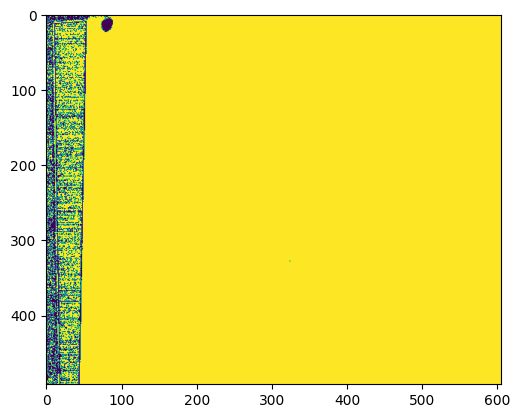

In [13]:
mask_binary = np.logical_and(film[:,:,0], film[:,:,1], film[:,:,2])
plt.imshow(mask_binary)

In [17]:
mask_binary

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

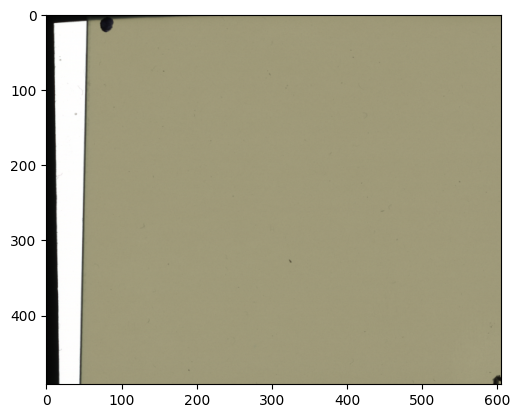

In [16]:
plt.imshow(img/np.max(img))

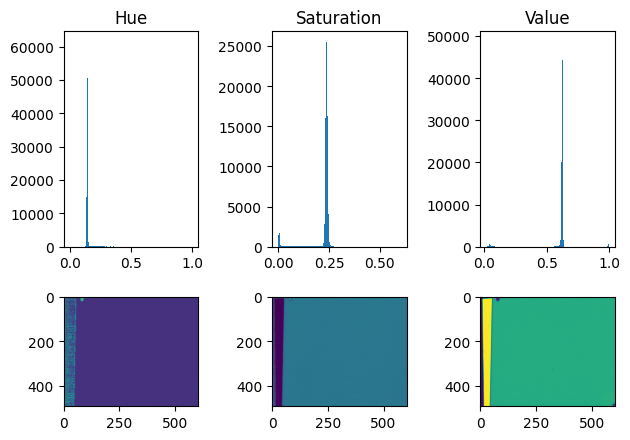

In [29]:
fig = plt.figure(tight_layout=True)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.hist(h.ravel(), 512)
ax1.set_title("Hue")
ax2.hist(s.ravel(), 512)
ax2.set_title("Saturation")
ax3.hist(v.ravel(), 512)
ax3.set_title("Value")
ax4.imshow(h)
ax5.imshow(s)
ax6.imshow(v)

In [48]:
hue_after_thresh = np.logical_and(h > 0.05, h < 0.29)
sat_after_thresh = s > 0.1
val_after_thresh = np.logical_and(v > 0.40, v < 0.9)
binary_img = np.logical_and(hue_after_thresh, sat_after_thresh, val_after_thresh)

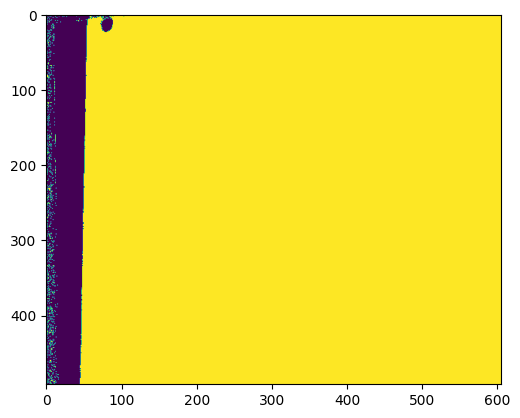

In [49]:
plt.imshow(binary_img)